# Roboflow

# Training

In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="MhQTUt2dV55y8QahObk5")
project = rf.workspace("object-tracking-7zamj").project("my-first-project-cslwr")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to My-First-Project-3 in yolov11:: 100%|█| 258/25


In [1]:
from ultralytics import YOLO
from IPython.display import Image

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.159 🚀 Python-3.12.2 torch-2.6.0+cu124 CPU (12th Gen Intel Core(TM) i5-12400F)
Setup complete ✅ (12 CPUs, 7.6 GB RAM, 64.0/354.6 GB disk)


In [4]:
dataset.location

NameError: name 'dataset' is not defined

In [5]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 8.71MB/s]
Ultralytics 8.3.159 🚀 Python-3.12.2 torch-2.6.0+cu124 CPU (12th Gen Intel Core(TM) i5-12400F)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/tik/Desktop/all/My-First-Project-3/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, op

# Result

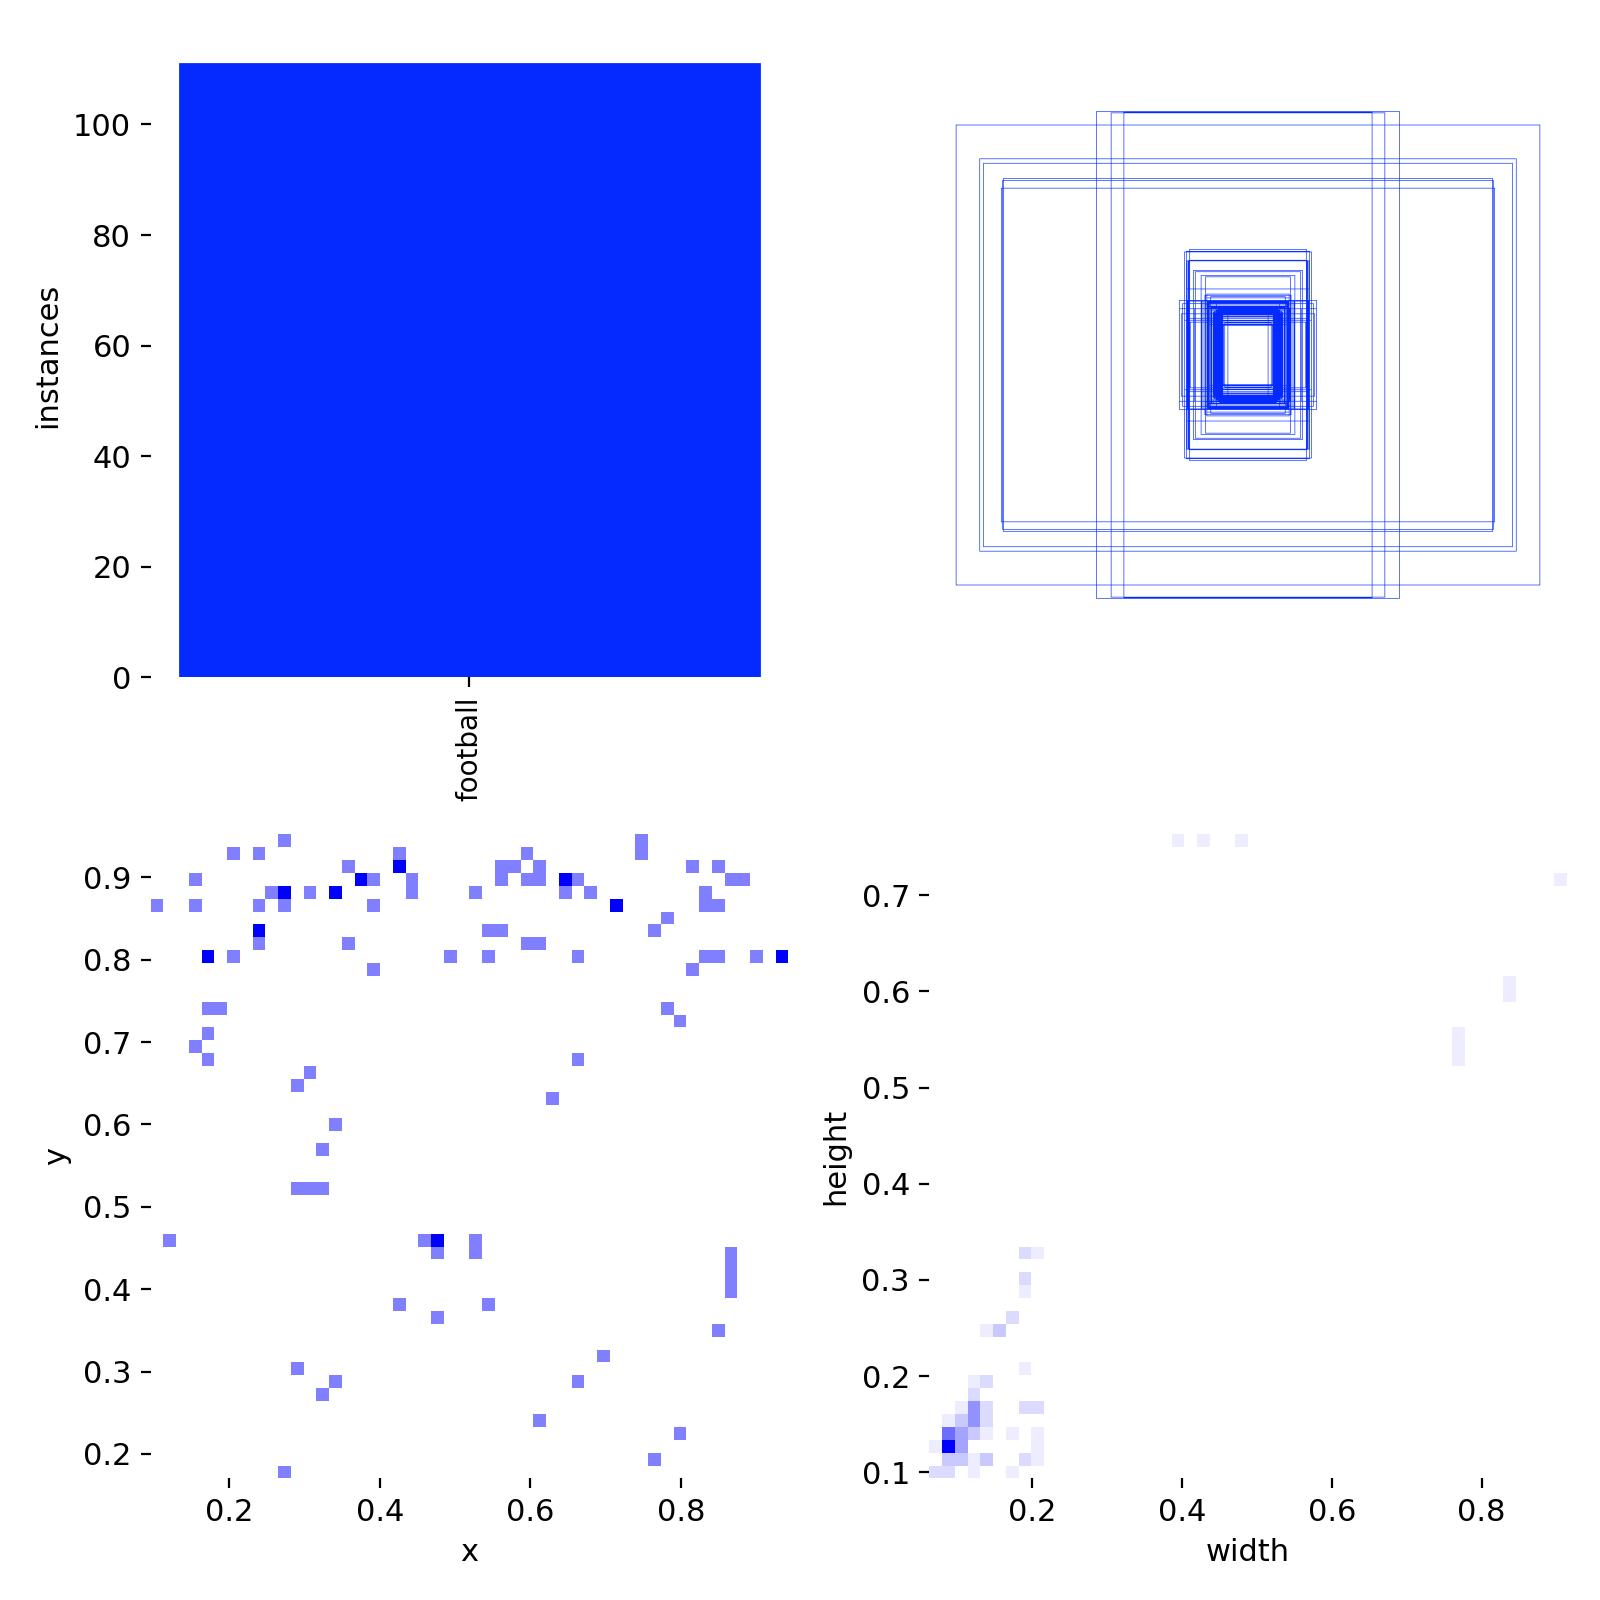

In [7]:
Image("/home/tik/Desktop/all/runs/detect/train/labels.jpg", width=600)

In [8]:
!yolo task=detect mode=val model="/home/tik/Desktop/all/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.159 🚀 Python-3.12.2 torch-2.6.0+cu124 CPU (12th Gen Intel Core(TM) i5-12400F)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4527.9±827.6 MB/s, size: 51.0 KB)
val: Scanning /home/tik/Desktop/all/My-First-Project-3/valid/labels.cache... 7 i
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2, len(boxes) = 7. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
/home/tik/anaconda3/envs/david/lib/python3.12/site-packages/torch/cuda/__init__.py:734: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          7          7      0.976      0.857      0.964      0.727
Speed: 1.5ms preprocess, 62.0ms inference, 0.0ms loss, 3

# Testing with OpenCV

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO

# Load the trained YOLOv11 model
model = YOLO("runs/detect/train/weights/best.pt")  # Path to your trained model weights

def detect_objects(frame):
    results = model(frame)
    detected_objects = []

    for r in results:
        for box in r.boxes:
            class_id = int(box.cls[0])  # Get class ID
            confidence = box.conf[0].item()  # Confidence score

            if confidence > 0.5:
                label = model.names[class_id]
                detected_objects.append(label)

                # Draw bounding box
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    return frame, detected_objects


def main():
    cap = cv2.VideoCapture(0)  # Open webcam

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame, detected_objects = detect_objects(frame)
        cv2.imshow("yolo", frame)
        if detected_objects:
            print(detected_objects,frame)
        key = cv2.waitKey(1) & 0xFF

    cap.release()
    cv2.destroyAllWindows()


if __name__ == "__main__":
    main()


0: 480x640 1 football, 55.5ms
Speed: 2.3ms preprocess, 55.5ms inference, 2.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 football, 63.5ms
Speed: 3.5ms preprocess, 63.5ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)



0: 480x640 1 football, 48.4ms
Speed: 1.2ms preprocess, 48.4ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 football, 69.1ms
Speed: 1.6ms preprocess, 69.1ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 footballs, 41.2ms
Speed: 1.5ms preprocess, 41.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 football, 39.9ms
Speed: 1.8ms preprocess, 39.9ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
['football'] [[[  7  10   9]
  [  8  11  10]
  [ 13  13  13]
  ...
  [ 94  88  64]
  [ 95  91  62]
  [ 95  91  62]]

 [[  5  10   9]
  [  6  11  10]
  [ 14  14  14]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 [[  4   9   8]
  [  6  11  10]
  [ 14  14  14]
  ...
  [  0 255   0]
  [  0 255   0]
  [  0 255   0]]

 ...

 [[146 170 168]
  [147 171 169]
  [147 171 169]
  ...
  [197 222 218]
  [192 216 212]
  [193 217 213]]

 [[146 170 168]
  [146 170 168]
  [146 170 166]
  ...

In [2]:
import requests
from bs4 import BeautifulSoup
import os
import urllib.request
import time

url = "https://www.pexels.com/search/black%20people/"

# Directory to save images
save_dir = "pexels_images"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

def download_images():
    try:
        # Send request to the website
        response = requests.get(url, headers=headers)
        response.raise_for_status()  # Check for request errors
        
        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find all image elements (Pexels uses <img> tags with src for thumbnails)
        img_tags = soup.find_all('img', class_='PhotoItem__image')
        
        if not img_tags:
            print("No images found on the page.")
            return
        
        print(f"Found {len(img_tags)} images.")
        
        # Download each image
        for i, img in enumerate(img_tags):
            img_url = img.get('src')
            if not img_url:
                print(f"Image {i+1}: No src attribute found, skipping.")
                continue
                
            # Ensure the URL is complete
            if not img_url.startswith('http'):
                img_url = f"https:{img_url}"
                
            # Get the image file name
            file_name = img_url.split('/')[-1].split('?')[0]
            file_path = os.path.join(save_dir, f"image_{i+1}_{file_name}")
            
            try:
                # Download and save the image
                urllib.request.urlretrieve(img_url, file_path)
                print(f"Downloaded image {i+1}: {file_name}")
                
                # Respectful delay to avoid overwhelming the server
                time.sleep(1)
                
            except Exception as e:
                print(f"Error downloading image {i+1}: {e}")
                
    except requests.RequestException as e:
        print(f"Error fetching the page: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    print("Starting image download...")
    download_images()
    print("Download completed.")

Starting image download...
Error fetching the page: 403 Client Error: Forbidden for url: https://www.pexels.com/search/black%20people/
Download completed.
